In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('./src')

from data_queries import  getClusterInfo, getGAIAKnownMembers
from gaiastars import gaiastars as gs

import astropy.units as u

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
from  gaiastars import gaiadr2xdr3
known_cluster_members, cluster_names = getGAIAKnownMembers()
# just deal with Pleiades and alphaPer for now
cluster_names = ['Pleiades', 'alphaPer']
xmatches = {}
cluster_members={}
#for cl in cluster_names:
for cl in cluster_names:
    known_members_dr2 = list(known_cluster_members.query('Cluster == @cl').index)
    xmatches[cl] = gaiadr2xdr3(known_members_dr2)
    cluster_members[cl]  = gs(name = cl, description=f'{cl} sources from Table 1a records from Gaia archive')
    cluster_members[cl].from_source_idlist(list(xmatches[cl].dr3_source_id),schema='gaiaedr3', query_type='sync')

#construct a dict mapping cluster name in Table1a to its name in Simabad
cluster_info = getClusterInfo()

search_results = {}

from gaiastars import from_pickle

for cl in cluster_names:
    search_results[cl] = from_pickle(f'./data/search_results_{cl}.pkl')

#exclude the known members returned from the search
for cl in cluster_names:
    merged_fs = search_results[cl].merge(cluster_members[cl])
    print(f'------ {cl} -------')
    print(merged_fs.objs.which.value_counts())
    fs = merged_fs.query('which == \'{} cone search\''.format(cl))
    fs.name = 'Search Results, Known Members excluded'
    search_results[cl] = fs

for cl in cluster_names:
    maxsep = cluster_members[cl].maxsep() /2.0
    print(f'{cl}: Maxsep: {maxsep}')
    search_results[cl].points_to(cluster_info.loc[cl]['coords'],maxsep.value, inplace=True, allcalcs=True)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
------ Pleiades -------
Pleiades cone search    107919
both                      1225
Pleiades                   101
Name: which, dtype: int64
------ alphaPer -------
alphaPer cone search    291664
both                       699
alphaPer                    41
Name: which, dtype: int64
Pleiades: Maxsep: 3.328984626197819 deg
alphaPer: Maxsep: 2.5454915501451394 deg


In [3]:
import os
os.getcwd()

'/home/kevin_leo_mcmanus/repos/runawaysearch'

In [4]:
maxsep = cluster_members['Pleiades'].maxsep() /2.0
maxsep

<Angle 3.32898463 deg>

In [5]:
from explain_pt import explain_pt

In [6]:
explain_pt(search_results['Pleiades'].objs.iloc[222], cluster_info.loc['Pleiades']['coords'], maxsep.degree)

Input:
               ra        dec  pm_ra_cosdec      pm_dec
Which                                                 
Star     44.54928   2.170299     77.164331 -120.947563
Cluster  56.44000  23.860000     19.997000  -45.548000

Colatitude Star (radian): 1.5329
Colatitude Center (radian): 1.1544
Polar Angle, Star-to-Center (radian): -0.2075

Step 1: Calculate Theta, angle from star to center wrt. Meridian
----------------------------------------------------------------
Step 1a: Calculate Great Circle Distance Star-to-Center (radian)
	cos(star_cen_dist) = cos(colat_star)*cos(colat_center) + sin(colat_star)*sin(colat_center)*cos(polar_angle)
	cos(star_cen_dist) = cos(1.5329)*cos(1.1544) + sin(1.5329)*sin(1.1544)*cos(-0.2075)
	cos(star_cen_dist) = 0.9096
	star_cen_dist = 0.4285 radian
Step 1b: Calculate theta: angle from star to center wrt. meridian
	cos(colat_center) = cos(star_cen_dist)*cos(colat_star) + sin(star_cen_dist)*sin(colat_star)*cos(theta)
	Solve for theta:
	cos(theta) = (cos(c

In [7]:
search_results['Pleiades'].objs.iloc[222]

_merge                         left_only
which               Pleiades cone search
ra                               44.5493
dec                               2.1703
parallax                          6.6092
pmra                             77.1643
pmdec                           -120.948
radial_velocity                      NaN
phot_g_mean_mag                  16.7115
phot_bp_mean_mag                 17.6973
phot_rp_mean_mag                 15.0903
ruwe                             1.14379
r_est                            151.304
cen_dist                        0.428502
theta                           0.470697
c                               0.432181
gamma                           0.139087
delta_pm_ra                      57.1673
delta_pm_dec                    -75.3996
pm_dir                           2.49287
pm_dir_prime                     5.63446
points_to                          False
Name: 1282756408103936, dtype: object

In [8]:
search_results['Pleiades'].objs.query('points_to').head()

,_merge,which,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,...,r_est,cen_dist,theta,c,gamma,delta_pm_ra,delta_pm_dec,pm_dir,pm_dir_prime,points_to
source_id,,,,,,,,,,,,,,,,,,,,,
621228365371520,left_only,Pleiades cone search,46.443202,1.760904,6.709978,-13.442013,-133.510406,NaN,15.443704,16.635983,...,149.031779,0.421060,0.398914,0.424812,0.141363,-33.439013,-87.962406,-2.778314,0.363279,True
621297084847872,left_only,Pleiades cone search,46.439646,1.767968,6.726454,-13.464543,-133.151323,NaN,16.428431,17.805946,...,148.666739,0.420971,0.399147,0.424724,0.141391,-33.461543,-87.603323,-2.776728,0.364864,True
824294419098240,left_only,Pleiades cone search,47.210041,2.729455,12.909211,4.891285,-92.906115,NaN,14.395027,15.821107,...,77.464065,0.400326,0.385905,0.404295,0.148161,-15.105715,-47.358115,-2.832826,0.308766,True
911632578530944,left_only,Pleiades cone search,45.945342,2.521983,8.495969,10.539835,-70.220999,NaN,15.493484,16.859322,...,117.702884,0.412388,0.428617,0.416228,0.144122,-9.457165,-24.672999,-2.775565,0.366028,True
1021759835513088,left_only,Pleiades cone search,46.698325,2.766141,8.174193,-15.796483,-114.005202,NaN,17.052393,18.809666,...,122.336233,0.403174,0.405433,0.407112,0.147185,-35.793483,-68.457202,-2.659825,0.481767,True


In [9]:
explain_pt(search_results['Pleiades'].objs.loc[1021759835513088], cluster_info.loc['Pleiades']['coords'], maxsep.degree)

Input:
                ra        dec  pm_ra_cosdec      pm_dec
Which                                                  
Star     46.698325   2.766141    -15.796483 -114.005202
Cluster  56.440000  23.860000     19.997000  -45.548000

Colatitude Star (radian): 1.5225
Colatitude Center (radian): 1.1544
Polar Angle, Star-to-Center (radian): -0.1700

Step 1: Calculate Theta, angle from star to center wrt. Meridian
----------------------------------------------------------------
Step 1a: Calculate Great Circle Distance Star-to-Center (radian)
	cos(star_cen_dist) = cos(colat_star)*cos(colat_center) + sin(colat_star)*sin(colat_center)*cos(polar_angle)
	cos(star_cen_dist) = cos(1.5225)*cos(1.1544) + sin(1.5225)*sin(1.1544)*cos(-0.1700)
	cos(star_cen_dist) = 0.9198
	star_cen_dist = 0.4032 radian
Step 1b: Calculate theta: angle from star to center wrt. meridian
	cos(colat_center) = cos(star_cen_dist)*cos(colat_star) + sin(star_cen_dist)*sin(colat_star)*cos(theta)
	Solve for theta:
	cos(theta) = (c

In [10]:
search_results['Pleiades'].objs.loc[1021759835513088]

_merge                         left_only
which               Pleiades cone search
ra                               46.6983
dec                              2.76614
parallax                         8.17419
pmra                            -15.7965
pmdec                           -114.005
radial_velocity                      NaN
phot_g_mean_mag                  17.0524
phot_bp_mean_mag                 18.8097
phot_rp_mean_mag                 15.7962
ruwe                             1.05491
r_est                            122.336
cen_dist                        0.403174
theta                           0.405433
c                               0.407112
gamma                           0.147185
delta_pm_ra                     -35.7935
delta_pm_dec                    -68.4572
pm_dir                          -2.65983
pm_dir_prime                    0.481767
points_to                           True
Name: 1021759835513088, dtype: object

## Star RA > Center RA

In [11]:
cluster_info.loc['Pleiades']['coords']

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (56.44, 23.86, 135.79576317)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (19.997, -45.548, 5.65)>

In [12]:
search_results['Pleiades'].objs.query('ra > 56.44 and points_to').tail()

,_merge,which,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,...,r_est,cen_dist,theta,c,gamma,delta_pm_ra,delta_pm_dec,pm_dir,pm_dir_prime,points_to
source_id,,,,,,,,,,,,,,,,,,,,,
3448737143872434560,left_only,Pleiades cone search,83.006218,32.132588,5.678070,7.019189,-42.494859,30.732189,10.830565,11.149635,...,176.116165,0.432723,1.793269,0.436362,0.137830,-12.977811,3.053141,-1.339739,1.801853,True
3448966696987545216,left_only,Pleiades cone search,82.470295,32.729376,6.450752,-21.417272,-28.567032,-8.228831,12.847070,13.471132,...,155.020682,0.427507,1.824409,0.431195,0.139386,-41.414272,16.980968,-1.181676,1.959917,True
3448983430179411584,left_only,Pleiades cone search,81.944185,32.494761,5.765682,-9.431272,-38.467829,NaN,18.694046,18.724106,...,173.440030,0.418992,1.824871,0.422764,0.142011,-29.428272,7.080171,-1.334693,1.806900,True
3449035588265702272,left_only,Pleiades cone search,82.446506,33.275727,5.519019,-2.794866,-37.623183,37.759857,11.928969,12.352233,...,181.191627,0.429658,1.844982,0.433326,0.138740,-22.791866,7.924817,-1.236169,1.905424,True
3449143512202724736,left_only,Pleiades cone search,82.414670,33.451564,6.348238,18.576520,-44.925947,16.938128,8.591831,8.798561,...,157.524016,0.430053,1.852002,0.433717,0.138622,-1.420480,0.622053,-1.158035,1.983557,True


In [13]:
explain_pt(search_results['Pleiades'].objs.loc[3449143512202724736], cluster_info.loc['Pleiades']['coords'], maxsep.degree)

Input:
               ra        dec  pm_ra_cosdec     pm_dec
Which                                                
Star     82.41467  33.451564      18.57652 -44.925947
Cluster  56.44000  23.860000      19.99700 -45.548000

Colatitude Star (radian): 0.9870
Colatitude Center (radian): 1.1544
Polar Angle, Star-to-Center (radian): 0.4533

Step 1: Calculate Theta, angle from star to center wrt. Meridian
----------------------------------------------------------------
Step 1a: Calculate Great Circle Distance Star-to-Center (radian)
	cos(star_cen_dist) = cos(colat_star)*cos(colat_center) + sin(colat_star)*sin(colat_center)*cos(polar_angle)
	cos(star_cen_dist) = cos(0.9870)*cos(1.1544) + sin(0.9870)*sin(1.1544)*cos(0.4533)
	cos(star_cen_dist) = 0.9089
	star_cen_dist = 0.4301 radian
Step 1b: Calculate theta: angle from star to center wrt. meridian
	cos(colat_center) = cos(star_cen_dist)*cos(colat_star) + sin(star_cen_dist)*sin(colat_star)*cos(theta)
	Solve for theta:
	cos(theta) = (cos(colat_c

In [14]:
search_results['Pleiades'].objs.loc[3449143512202724736]

_merge                         left_only
which               Pleiades cone search
ra                               82.4147
dec                              33.4516
parallax                         6.34824
pmra                             18.5765
pmdec                           -44.9259
radial_velocity                  16.9381
phot_g_mean_mag                  8.59183
phot_bp_mean_mag                 8.79856
phot_rp_mean_mag                 8.23184
ruwe                              1.1321
r_est                            157.524
cen_dist                        0.430053
theta                              1.852
c                               0.433717
gamma                           0.138622
delta_pm_ra                     -1.42048
delta_pm_dec                    0.622053
pm_dir                          -1.15804
pm_dir_prime                     1.98356
points_to                           True
Name: 3449143512202724736, dtype: object

## Star RA <= Center RA

In [15]:
search_results['Pleiades'].objs.query('ra < 56.44 and points_to').tail()

,_merge,which,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,...,r_est,cen_dist,theta,c,gamma,delta_pm_ra,delta_pm_dec,pm_dir,pm_dir_prime,points_to
source_id,,,,,,,,,,,,,,,,,,,,,
3277562905914798336,left_only,Pleiades cone search,55.193696,6.757297,6.984757,14.576144,-86.073291,NaN,15.734861,17.014221,...,143.168896,0.299228,0.067530,0.304651,0.194820,-5.420856,-40.525291,-3.008617,0.132975,True
3277714462424960640,left_only,Pleiades cone search,55.183453,7.162590,5.070109,13.457408,-105.775263,-21.909615,12.520571,13.016225,...,197.234430,0.292183,0.069681,0.297742,0.199259,-6.539592,-60.227263,-3.033434,0.108158,True
3277714462426272128,left_only,Pleiades cone search,55.184385,7.162588,5.023245,13.332146,-105.397309,NaN,16.685976,17.455332,...,199.074507,0.292182,0.069630,0.297741,0.199260,-6.664854,-59.849309,-3.030689,0.110904,True
3277719444587114496,left_only,Pleiades cone search,55.285793,7.169153,6.301307,18.444911,-52.259475,NaN,19.943869,20.417158,...,158.697224,0.291951,0.064048,0.297514,0.199409,-1.552089,-6.711475,-2.914329,0.227264,True
3277778886934475008,left_only,Pleiades cone search,54.288386,6.706962,6.325445,19.774254,-70.021406,NaN,20.155241,20.541721,...,158.091643,0.301541,0.115869,0.306920,0.193407,-0.222746,-24.473406,-3.132491,0.009101,True


In [16]:
explain_pt(search_results['Pleiades'].objs.loc[3277714462426272128], cluster_info.loc['Pleiades']['coords'], maxsep.degree)

Input:
                ra        dec  pm_ra_cosdec      pm_dec
Which                                                  
Star     55.184385   7.162588     13.332146 -105.397309
Cluster  56.440000  23.860000     19.997000  -45.548000

Colatitude Star (radian): 1.4458
Colatitude Center (radian): 1.1544
Polar Angle, Star-to-Center (radian): -0.0219

Step 1: Calculate Theta, angle from star to center wrt. Meridian
----------------------------------------------------------------
Step 1a: Calculate Great Circle Distance Star-to-Center (radian)
	cos(star_cen_dist) = cos(colat_star)*cos(colat_center) + sin(colat_star)*sin(colat_center)*cos(polar_angle)
	cos(star_cen_dist) = cos(1.4458)*cos(1.1544) + sin(1.4458)*sin(1.1544)*cos(-0.0219)
	cos(star_cen_dist) = 0.9576
	star_cen_dist = 0.2922 radian
Step 1b: Calculate theta: angle from star to center wrt. meridian
	cos(colat_center) = cos(star_cen_dist)*cos(colat_star) + sin(star_cen_dist)*sin(colat_star)*cos(theta)
	Solve for theta:
	cos(theta) = (c

## Four Quadrants

In [17]:
cen_ra = cluster_info.loc['Pleiades']['coords'].ra.degree
cen_dec = cluster_info.loc['Pleiades']['coords'].dec.degree
cen_ra, cen_dec

(56.44, 23.86)

In [18]:
pt_cols = ['ra','dec','pmra','pmdec','points_to']

In [19]:
def get_validation_ids(df, cen_ra, cen_dec, seed = 1234):
    first = True
    q_strings = ['ra > @cen_ra & dec > @cen_dec',
                 'ra < @cen_ra & dec > @cen_dec',
                 'ra < @cen_ra & dec < @cen_dec',
                 'ra > @cen_ra & dec < @cen_dec']
    id_list= []
    for q in q_strings:
        if first:
            r_state = seed
            first = False
        else:
            r_state = None
        quad = df.query(q)
        quad_ids = [ quad.query('points_to == @pt').sample(1,random_state=r_state).index[0] for pt in [True, False]]
        id_list += quad_ids

    return id_list

In [40]:
id_list = get_validation_ids(search_results['Pleiades'].objs, cen_ra, cen_dec)
id_list

[225582784878513920,
 174159446384702336,
 119604707366448640,
 124460769190981760,
 60633363283558656,
 44798677857816192,
 3414534081614209536,
 3395135982081178240]

In [41]:
val_set = search_results['Pleiades'].objs.loc[id_list]

In [42]:
val_set.columns

Index(['_merge', 'which', 'ra', 'dec', 'parallax', 'pmra', 'pmdec',
       'radial_velocity', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'ruwe', 'r_est', 'cen_dist', 'theta', 'c', 'gamma',
       'delta_pm_ra', 'delta_pm_dec', 'pm_dir', 'pm_dir_prime', 'points_to'],
      dtype='object')

In [43]:
val_set[['ra','dec','r_est','pmra','pmdec']]

,ra,dec,r_est,pmra,pmdec
source_id,,,,,
225582784878513920,61.319442,37.601731,134.310921,1.305734,-7.800045
174159446384702336,72.637396,35.859036,120.108625,9.820030,-69.606188
119604707366448640,54.380362,29.028667,193.528521,12.592015,-13.911926
124460769190981760,52.484931,32.065382,119.461997,36.382657,-21.253123
60633363283558656,47.307343,21.023757,93.863707,-35.792105,-70.745509
44798677857816192,56.108403,18.099554,141.055203,16.797420,-35.961300
3414534081614209536,80.499601,22.186402,145.181531,1.260045,-46.460211
3395135982081178240,77.273416,17.857771,171.694753,24.056912,-31.616700


In [44]:
from astropy.coordinates import SkyCoord
val_set_coords = SkyCoord(ra = list(val_set.ra)*u.degree,
                         dec = list(val_set.dec)*u.degree,
                         distance = list(val_set.r_est)*u.pc,
                         pm_ra_cosdec = list(val_set.pmra)*u.mas/u.year,
                         pm_dec = list(val_set.pmdec)*u.mas/u.year)

In [38]:
val_set_coords_100000 = val_set_coords.apply_space_motion(dt=100000)

Text(0.5, 1.0, 'Points to/Not Points to in Four Quadrants')

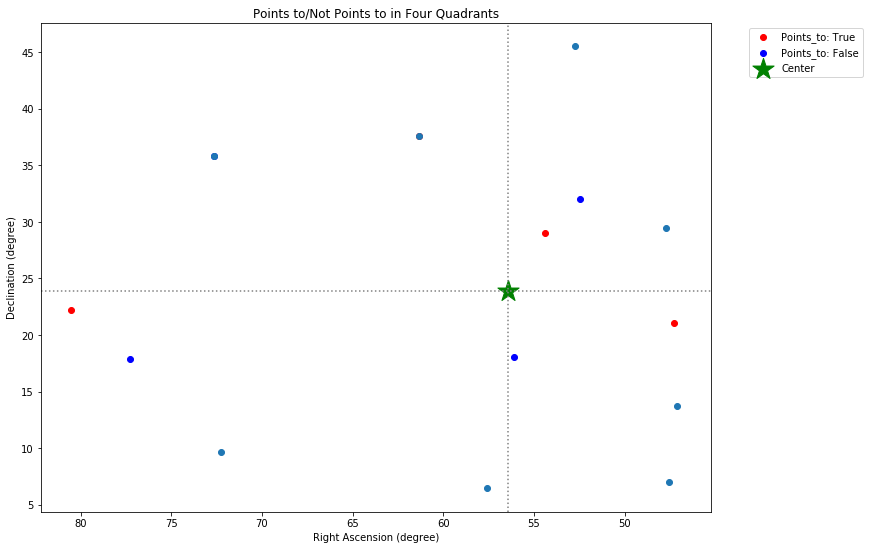

In [46]:


fig = plt.figure(figsize=(12,9))
ax = fig.subplots(1,1)

for pt, c in zip([True, False],['red', 'blue']):
    df = val_set.query('points_to == @pt')
    ax.scatter(df.ra, df.dec, color=c, label=f'Points_to: {pt}')
ax.scatter(val_set_coords_100000.ra.value, val_set_coords_100000.dec.value)
ax.scatter(cen_ra, cen_dec,  label='Center', s=500, color='green', marker='*')
ax.axvline(cen_ra, ls=':', color='gray')
ax.axhline(cen_dec, ls=':', color='gray')
ax.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
ax.invert_xaxis()
ax.set_xlabel("Right Ascension (degree)")
ax.set_ylabel("Declination (degree)")
ax.set_title("Points to/Not Points to in Four Quadrants")



In [23]:
pt_cols = ['ra','dec','pmra','pmdec','cen_dist', 'theta', 'c', 'gamma',
       'delta_pm_ra', 'delta_pm_dec', 'pm_dir', 'pm_dir_prime', 'points_to']

In [27]:
cluster_info.loc['Pleiades']['coords']

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (56.44, 23.86, 135.79576317)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (19.997, -45.548, 5.65)>

In [24]:
search_results['Pleiades'].objs.loc[id_list][pt_cols]

,ra,dec,pmra,pmdec,cen_dist,theta,c,gamma,delta_pm_ra,delta_pm_dec,pm_dir,pm_dir_prime,points_to
source_id,,,,,,,,,,,,,
225582784878513920,61.319442,37.601731,1.305734,-7.800045,0.250654,2.822588,0.257162,0.230347,-18.691266,37.747955,-0.459768,2.681825,True
174159446384702336,72.637396,35.859036,9.820030,-69.606188,0.321602,2.202400,0.326629,0.181987,-10.176970,-24.058188,-2.741405,0.400188,False
128167429045735424,38.143422,28.756837,-18.320005,-34.802106,0.298369,1.787198,0.303808,0.195350,-38.317005,10.745894,-1.297373,1.844220,True
240968903922724992,50.506950,42.390435,21.185707,-14.295668,0.334615,2.849609,0.339435,0.175302,1.188707,31.252332,0.038017,3.179610,False
85814992762646656,37.259105,18.246685,-58.456843,-82.970402,0.327069,1.209014,0.332007,0.179114,-78.453843,-37.422402,-2.015874,1.125718,True
3390481543223936,46.697557,3.906762,-102.028934,-59.387320,0.384961,0.424770,0.389105,0.153675,-122.025934,-13.839320,-1.683727,1.457866,False
3259021429018005760,62.989825,2.026886,13.050041,-61.020596,0.396792,0.273323,0.400800,0.149391,-6.946959,-15.472596,-2.719583,0.422009,True
39237760361719552,59.815854,14.692063,7.452137,-42.840594,0.169374,0.325180,0.178972,0.332278,-12.544863,2.707406,-1.358239,1.783354,False
